# 🧩 Notebook 05: Bootstrap Simulation & Confidence Intervals with SciPy

In [1]:
# Setup and Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys

# ✅ Setup path to use utils
PROJECT_ROOT = Path.cwd().parent
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

from utils.sim_utils import (
    bootstrap_statistic,
    compute_bootstrap_ci,
    summarize_bootstrap,
)

from utils.viz_utils import plot_bootstrap_distribution

# Constants
DATA_PATH = Path("../synthetic_data/exports")
EXPORT_PLOTS = Path("../exports/plots/05_bootstrap_simulation")
EXPORT_TABLES = Path("../exports/tables/05_bootstrap_simulation")

EXPORT_PLOTS.mkdir(parents=True, exist_ok=True)
EXPORT_TABLES.mkdir(parents=True, exist_ok=True)

## 🔹 Step 1: Load Synthetic Data

In [2]:
# Load Synthetic Data
df = pd.read_csv(DATA_PATH / "bootstrap_sample_data.csv")
df.head()

,normal_sample
0,107.450712
1,97.926035
2,109.715328
3,122.845448
4,96.487699


## 🔹 Step 2: Bootstrap the Mean of `normal_sample`

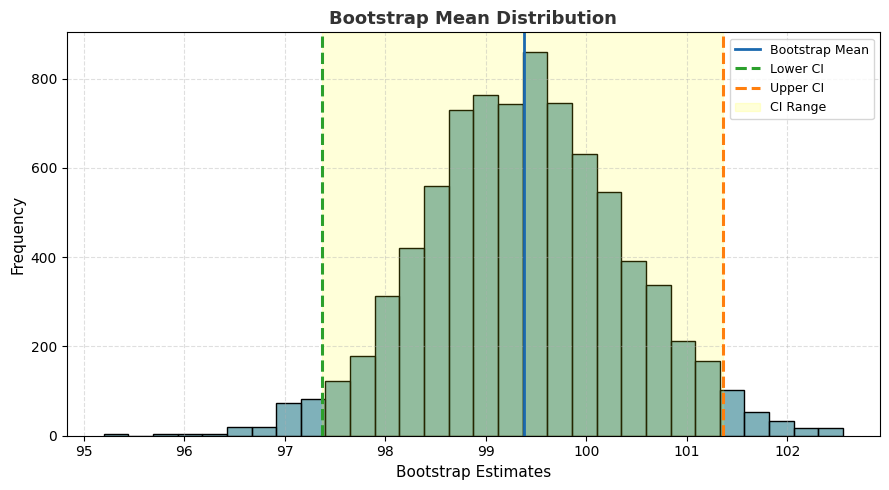

In [3]:
# Bootstrap the Mean of normal_sample
data = df["normal_sample"]
true_mean = data.mean() # true mean has been used in the step 6 (last block)
boot_means = bootstrap_statistic(data, np.mean, n_resamples=2000)
ci_bounds = compute_bootstrap_ci(boot_means, ci=95)

fig = plot_bootstrap_distribution(boot_means, ci_bounds, title="Bootstrap Mean Distribution")
fig.savefig(EXPORT_PLOTS / "bootstrap_mean.png")
plt.show()

## 🔹 Step 3: Bootstrap the Median

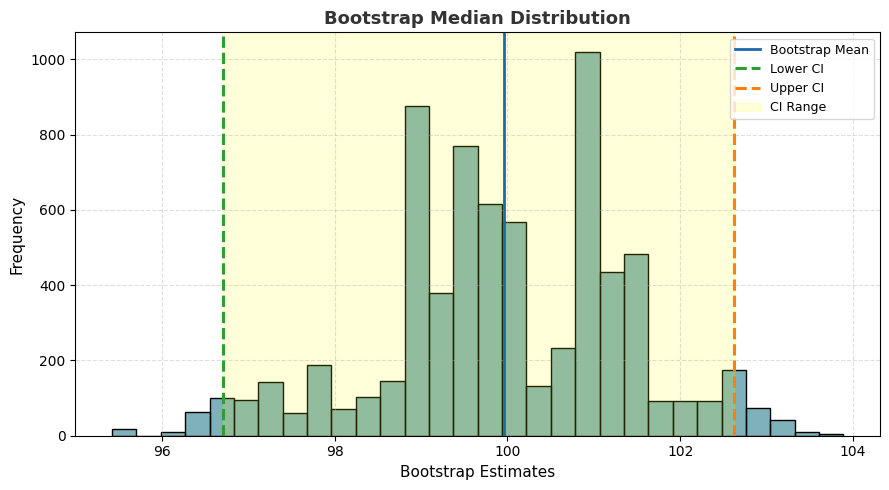

In [4]:
# Bootstrap the Median
true_median = data.median() # true median has been used in the step 6 (last block)
boot_medians = bootstrap_statistic(data, np.median, n_resamples=2000)
ci_bounds_median = compute_bootstrap_ci(boot_medians, ci=95)

fig = plot_bootstrap_distribution(boot_medians, ci_bounds_median, title="Bootstrap Median Distribution")
fig.savefig(EXPORT_PLOTS / "bootstrap_median.png")
plt.show()

## 🔹 Step 4: Summary Statistics

In [5]:
# Summary Statistics
summary_mean = summarize_bootstrap(boot_means)
summary_median = summarize_bootstrap(boot_medians)

summary_df = pd.DataFrame([summary_mean, summary_median], index=["Mean", "Median"])
summary_df.to_csv(EXPORT_TABLES / "bootstrap_summary.csv")
summary_df

,mean,std,ci_lower,ci_upper
Mean,99.375663,0.998793,97.371638,101.354861
Median,99.960498,1.417311,96.704922,102.618667


## 🔹 Step 5: Bootstrap for Standard Deviation

In [6]:
# Bootstrap for Standard Deviation
boot_stds = bootstrap_statistic(data, np.std, n_resamples=2000)
ci_bounds_std = compute_bootstrap_ci(boot_stds, ci=95)
print(f"95% CI for Std Dev: {ci_bounds_std[0]:.2f} to {ci_bounds_std[1]:.2f}")

95% CI for Std Dev: 12.57 to 15.18


## 🔹 Step 6: Export full bootstrap samples

In [7]:
# Export full bootstrap samples
pd.Series(boot_means, name="Bootstrap_Mean").to_csv(EXPORT_TABLES / "boot_means_full.csv", index=False)
pd.Series(boot_medians, name="Bootstrap_Median").to_csv(EXPORT_TABLES / "boot_medians_full.csv", index=False)

# Export CI bounds
ci_df = pd.DataFrame({
    "Statistic": ["Mean", "Median", "Std Dev"],
    "True_Value": [true_mean, true_median, data.std()],
    "CI_Lower": [ci_bounds[0], ci_bounds_median[0], ci_bounds_std[0]],
    "CI_Upper": [ci_bounds[1], ci_bounds_median[1], ci_bounds_std[1]]
})
ci_df.to_csv(EXPORT_TABLES / "bootstrap_confidence_intervals.csv", index=False)
display(ci_df)


,Statistic,True_Value,CI_Lower,CI_Upper
0,Mean,99.388436,97.371638,101.354861
1,Median,99.937122,96.704922,102.618667
2,Std Dev,13.965059,12.572039,15.176240


In [8]:
print("🔹 Bootstrap CI Summary")
print(f"Mean     -> True: {true_mean:.2f},  95% CI: {ci_bounds}")
print(f"Median   -> True: {true_median:.2f}, 95% CI: {ci_bounds_median}")
print(f"Std Dev  -> True: {data.std():.2f}, 95% CI: {ci_bounds_std}")

🔹 Bootstrap CI Summary
Mean     -> True: 99.39,  95% CI: (np.float64(97.37163828727094), np.float64(101.35486142344857))
Median   -> True: 99.94, 95% CI: (np.float64(96.70492168243732), np.float64(102.6186671924776))
Std Dev  -> True: 13.97, 95% CI: (np.float64(12.572039268508137), np.float64(15.176240398755299))


## 🧠 Key Takeaways
- Bootstrapping resamples data with replacement to estimate the sampling distribution of a statistic.
- Confidence intervals are derived using quantiles of the bootstrap distribution.
- This method is non-parametric, requiring no assumption about population distribution.
- Both mean and median can be bootstrapped using the same reusable utility.

## ✅ Summary
In this notebook, we:

- Loaded synthetic `normal_sample` data
- Bootstrapped the mean and median using `np.random.choice`
- Computed 95% confidence intervals from resamples
- Visualized the distributions with CI bounds
- Exported plots and a comparison summary of statistics